Lab 1: Astro 361 Steven Wedel swedel@umich.edu



Exercise 1:

In [1]:
import numpy as np
x = np.array([[0,1,2,1],
             [0,1,1,2],
             [0,1,0,1],
            [1,1,1,1]])
y = np.array([[0,1,0,1],
             [1,1,1,1],
             [0,2,1,2],
             [2,1,1,0]])
print(np.dot(x,y))

[[3 6 4 5]
 [5 5 4 3]
 [3 2 2 1]
 [3 5 3 4]]


Exercise 2:

In [3]:
import math
pi = math.pi
def fn(x, kMax):
    f = 1.0
    kMax+=1
    for k in range(1, kMax):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
x=100
kMax=1
while fn(x, kMax) - fn(x, kMax+1) != 0:
    kMax+=1
    
print(kMax)

122


Excercise 3:


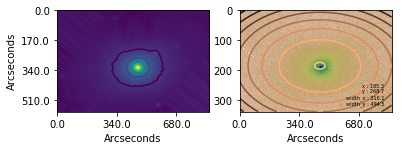

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import optimize
from scipy import ndimage
from numpy import *
from pylab import *
 
def arc(val,pos):
    return 1.7*val
 
image = fits.open('andromeda_rot.fits')
image
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)
 
def gaussian(height, center_x, center_y, width_x, width_y):
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)
 
def moments(data):
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y
 
def fitGaussian(data):
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p
 
plt.subplot(1,2,1)
plt.imshow(blurred_data)
plt.contour(blurred_data)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(arc))
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(arc))
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
 
plt2 = plt.subplot(1,2,2)
Xin, Yin = mgrid[0:201, 0:201]
imshow(data, cmap=cm.gist_earth_r)
params = fitGaussian(data)
fit = gaussian(*params)
contour(fit(*indices(data.shape)), cmap=cm.copper)
ax = gca()
(height, x, y, width_x, width_y) = params
text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=5, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(arc))
plt.xlabel('Arcseconds')

plt.show()